# Imports

In [1]:
import importlib
import sys
import torch

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

# Data

### Load Data Files

In [2]:
# Path to your pickle file (saved with torch.save)
file_path_train = '../../../../encoded_data/helpdesk_all_5_train.pkl'
# Load the dataset using torch.load
helpdesk_train_dataset = torch.load(file_path_train, weights_only=False)
# Check the type of the loaded dataset
print(type(helpdesk_train_dataset))  # Should output something like <class 'torch.utils.data.dataset.TensorDataset'>

# Path to your pickle file (saved with torch.save)
file_path_val = '../../../../encoded_data/helpdesk_all_5_val.pkl'
# Load the dataset using torch.load
helpdesk_val_dataset = torch.load(file_path_val, weights_only=False)
# Check the type of the loaded dataset
print(type(helpdesk_val_dataset))  # Should output something like <class 'torch.utils.data.dataset.TensorDataset'>

<class 'event_log_loader.new_event_log_loader.EventLogDataset'>
<class 'event_log_loader.new_event_log_loader.EventLogDataset'>


### Train Data Insights

In [3]:
# Helpdesk Dataset Categories, Features:

helpdesk_all_categories = helpdesk_train_dataset.all_categories

helpdesk_all_categories_cat = helpdesk_all_categories[0]
print(helpdesk_all_categories_cat)

helpdesk_all_categories_num = helpdesk_all_categories[1]
print(helpdesk_all_categories_num)

for i, cat in enumerate(helpdesk_all_categories_cat):
     print(f"Helpdesk (5) Categorical feature: {cat[0]}, Index position in categorical data list: {i}")
     print(f"Helpdesk (5) Total Amount of Category labels: {cat[1]}")
print('\n')    
for i, num in enumerate(helpdesk_all_categories_num):
     print(f"Helpdesk (5) Numerical feature: {num[0]}, Index position in categorical data list: {i}")
     print(f"Helpdesk (5) Amount Category Lables: {num[1]}")

[('Activity', 16, {'Assign seriousness': 1, 'Closed': 2, 'Create SW anomaly': 3, 'DUPLICATE': 4, 'EOS': 5, 'INVALID': 6, 'Insert ticket': 7, 'RESOLVED': 8, 'Require upgrade': 9, 'Resolve SW anomaly': 10, 'Resolve ticket': 11, 'Schedule intervention': 12, 'Take in charge ticket': 13, 'VERIFIED': 14, 'Wait': 15}), ('Resource', 24, {'EOS': 1, 'Value 1': 2, 'Value 10': 3, 'Value 11': 4, 'Value 12': 5, 'Value 13': 6, 'Value 14': 7, 'Value 15': 8, 'Value 16': 9, 'Value 17': 10, 'Value 18': 11, 'Value 19': 12, 'Value 2': 13, 'Value 20': 14, 'Value 21': 15, 'Value 22': 16, 'Value 3': 17, 'Value 4': 18, 'Value 5': 19, 'Value 6': 20, 'Value 7': 21, 'Value 8': 22, 'Value 9': 23}), ('VariantIndex', 175, {'1.0': 1, '10.0': 2, '100.0': 3, '103.0': 4, '104.0': 5, '107.0': 6, '109.0': 7, '11.0': 8, '110.0': 9, '112.0': 10, '113.0': 11, '114.0': 12, '115.0': 13, '117.0': 14, '118.0': 15, '12.0': 16, '120.0': 17, '122.0': 18, '123.0': 19, '124.0': 20, '125.0': 21, '126.0': 22, '127.0': 23, '129.0': 24, 

### Input Features for Encoder and Decoder

In [4]:
# Create lists with name of Encoder features (input) and decoder features (input & output)

# Encoder features:
enc_feat_cat = []
enc_feat_num = []
for cat in helpdesk_all_categories_cat:
    enc_feat_cat.append(cat[0])
for num in helpdesk_all_categories_num:
    enc_feat_num.append(num[0])
enc_feat = [enc_feat_cat, enc_feat_num]
print("Input features encoder: ", enc_feat)

"""
# Decoder features:
dec_feat_cat = enc_feat_cat
dec_feat_num = enc_feat_num
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)
"""

# Decoder features:
dec_feat_cat = ['Activity', 'Resource']
dec_feat_num = ['case_elapsed_time', 'event_elapsed_time']
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)

Input features encoder:  [['Activity', 'Resource', 'VariantIndex', 'seriousness', 'customer', 'product', 'responsible_section', 'seriousness_2', 'service_level', 'service_type', 'support_section', 'workgroup'], ['case_elapsed_time', 'event_elapsed_time', 'day_in_week', 'seconds_in_day']]
Features decoder:  [['Activity', 'Resource'], ['case_elapsed_time', 'event_elapsed_time']]


# Model

In [5]:
import model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model
importlib.reload(model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model)
from model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model import DropoutUncertaintyEncoderDecoderLSTM

# Prediction decoder output sequence length
seq_len_pred = 4

# Size hidden layer
hidden_size = 128

# Number of cells
num_layers = 4

# Fixed Dropout probability 
dropout = 0.1

# Encoder Decoder model initialization
model = DropoutUncertaintyEncoderDecoderLSTM(data_set_categories=helpdesk_all_categories,
                                             enc_feat=enc_feat,
                                             dec_feat=dec_feat,
                                             seq_len_pred=seq_len_pred,
                                             hidden_size=hidden_size,
                                             num_layers=num_layers,
                                             dropout=dropout)

Data set categories:  ([('Activity', 16, {'Assign seriousness': 1, 'Closed': 2, 'Create SW anomaly': 3, 'DUPLICATE': 4, 'EOS': 5, 'INVALID': 6, 'Insert ticket': 7, 'RESOLVED': 8, 'Require upgrade': 9, 'Resolve SW anomaly': 10, 'Resolve ticket': 11, 'Schedule intervention': 12, 'Take in charge ticket': 13, 'VERIFIED': 14, 'Wait': 15}), ('Resource', 24, {'EOS': 1, 'Value 1': 2, 'Value 10': 3, 'Value 11': 4, 'Value 12': 5, 'Value 13': 6, 'Value 14': 7, 'Value 15': 8, 'Value 16': 9, 'Value 17': 10, 'Value 18': 11, 'Value 19': 12, 'Value 2': 13, 'Value 20': 14, 'Value 21': 15, 'Value 22': 16, 'Value 3': 17, 'Value 4': 18, 'Value 5': 19, 'Value 6': 20, 'Value 7': 21, 'Value 8': 22, 'Value 9': 23}), ('VariantIndex', 175, {'1.0': 1, '10.0': 2, '100.0': 3, '103.0': 4, '104.0': 5, '107.0': 6, '109.0': 7, '11.0': 8, '110.0': 9, '112.0': 10, '113.0': 11, '114.0': 12, '115.0': 13, '117.0': 14, '118.0': 15, '12.0': 16, '120.0': 17, '122.0': 18, '123.0': 19, '124.0': 20, '125.0': 21, '126.0': 22, '12

# Loss Object Creation

In [6]:
import loss.losses
importlib.reload(loss.losses)
from loss.losses import Loss

loss_obj = Loss()

# Training Configuration

In [7]:
import trainer.trainer
importlib.reload(trainer.trainer)
from trainer.trainer import Trainer
from torch.optim.lr_scheduler import ReduceLROnPlateau

from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(comment="Full_Helpdesk_grad")

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# lambda for L2 (weight, bias, dropout) regularization
# regularization_term = 1e-3

# Start learning rate
learning_rate = 1e-5

# Optimizer and Scheduler
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate, weight_decay=0)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, min_lr=1e-10)

# Epochs
num_epochs = 100

# BATCHING does not work currntly with custom implementation
batch_size = 128

# lambda for L2 (weight, bias, dropout) regularization: According to formula: 1/2N
# regularization_term = 1.0/(2.0*batch_size)
regularization_term = 1e-4

# shuffle data
shuffle = True

# Teacher forcing: Smaller 0.5 more target events are used for next event prediction.
teacher_forcing_ratio = 0.8

optimize_values = {"regularization_term":regularization_term,
                   "optimizer":optimizer,
                   "scheduler": scheduler,
                   "epochs":num_epochs,
                   "mini_batches":batch_size,
                   "shuffle": shuffle,
                   "teacher_forcing_ratio":teacher_forcing_ratio,}

suffix_data_split_value = 4

# GradNorm parameter
use_gradnorm = True
gn_alpha = 1.5
gn_learning_rate = 1e-4

number_tasks = len(dec_feat[0]) + len(dec_feat[1])

gradNorm = {"use_gradnorm":use_gradnorm,
            "number_tasks": number_tasks,
            "gn_alpha":gn_alpha,
            "gn_learning_rate": gn_learning_rate}

trainer = Trainer(device=device,
                  model=model,
                  data_train=helpdesk_train_dataset,
                  data_val=helpdesk_val_dataset,
                  loss_obj=loss_obj,
                  log_normal_loss_num_feature = [],
                  optimize_values=optimize_values,
                  suffix_data_split_value=suffix_data_split_value,
                  writer=writer,
                  gradnorm_values=gradNorm,
                  save_model_n_th_epoch = 1,
                  saving_path = 'Helpdesk_full_grad_norm_new_2.pkl')

# Train the model:
train_attenuated_losses, val_losses, val_attenuated_losses = trainer.train_model()

Device:  cuda


Model:  DropoutUncertaintyEncoderDecoderLSTM(
  (embeddings_enc): ModuleList(
    (0): Embedding(16, 8)
    (1): Embedding(24, 9)
    (2): Embedding(175, 29)
    (3): Embedding(3, 3)
    (4): Embedding(361, 43)
    (5): Embedding(23, 9)
    (6): Embedding(9, 5)
    (7-9): 3 x Embedding(6, 4)
    (10): Embedding(8, 5)
    (11): Embedding(6, 4)
  )
  (encoder): DropoutUncertaintyLSTMEncoder(
    (embeddings): ModuleList(
      (0): Embedding(16, 8)
      (1): Embedding(24, 9)
      (2): Embedding(175, 29)
      (3): Embedding(3, 3)
      (4): Embedding(361, 43)
      (5): Embedding(23, 9)
      (6): Embedding(9, 5)
      (7-9): 3 x Embedding(6, 4)
      (10): Embedding(8, 5)
      (11): Embedding(6, 4)
    )
    (first_layer): DropoutUncertaintyLSTMCell(
      (Wi): Linear(in_features=131, out_features=128, bias=True)
      (Ui): Linear(in_features=128, out_features=128, bias=True)
      (Wf): Linear(in_features=131, out_features=128, bias=True)
      (Uf): Linear(in_features=128, out_fe

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 8.3075


Validation: Avg Standard Validation Loss: 8.0863
Validation: Avg Attenuated Validation Loss: 7.9291
Validation Loss for Scheduler: 8.0863
saving model


Epoch [2/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 8.2797


Validation: Avg Standard Validation Loss: 8.0150
Validation: Avg Attenuated Validation Loss: 7.8534
Validation Loss for Scheduler: 8.0150
saving model


Epoch [3/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 8.0636


Validation: Avg Standard Validation Loss: 7.4935
Validation: Avg Attenuated Validation Loss: 7.2473
Validation Loss for Scheduler: 7.4935
saving model


Epoch [4/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 6.5820


Validation: Avg Standard Validation Loss: 5.6578
Validation: Avg Attenuated Validation Loss: 5.1410
Validation Loss for Scheduler: 5.6578
saving model


Epoch [5/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 5.0137


Validation: Avg Standard Validation Loss: 5.0602
Validation: Avg Attenuated Validation Loss: 4.3154
Validation Loss for Scheduler: 5.0602
saving model


Epoch [6/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.4749


Validation: Avg Standard Validation Loss: 4.8971
Validation: Avg Attenuated Validation Loss: 4.0040
Validation Loss for Scheduler: 4.8971
saving model


Epoch [7/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.2089


Validation: Avg Standard Validation Loss: 4.8038
Validation: Avg Attenuated Validation Loss: 3.8313
Validation Loss for Scheduler: 4.8038
saving model


Epoch [8/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 3.9831


Validation: Avg Standard Validation Loss: 4.7058
Validation: Avg Attenuated Validation Loss: 3.6415
Validation Loss for Scheduler: 4.7058
saving model


Epoch [9/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 3.5738


Validation: Avg Standard Validation Loss: 4.4648
Validation: Avg Attenuated Validation Loss: 3.1419
Validation Loss for Scheduler: 4.4648
saving model


Epoch [10/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 3.2340


Validation: Avg Standard Validation Loss: 4.3067
Validation: Avg Attenuated Validation Loss: 2.8547
Validation Loss for Scheduler: 4.3067
saving model


Epoch [11/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 3.0314


Validation: Avg Standard Validation Loss: 4.2306
Validation: Avg Attenuated Validation Loss: 2.6551
Validation Loss for Scheduler: 4.2306
saving model


Epoch [12/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 2.8162


Validation: Avg Standard Validation Loss: 4.1361
Validation: Avg Attenuated Validation Loss: 2.4521
Validation Loss for Scheduler: 4.1361
saving model


Epoch [13/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 2.6342


Validation: Avg Standard Validation Loss: 4.0627
Validation: Avg Attenuated Validation Loss: 2.2750
Validation Loss for Scheduler: 4.0627
saving model


Epoch [14/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 2.4646


Validation: Avg Standard Validation Loss: 4.0340
Validation: Avg Attenuated Validation Loss: 2.1641
Validation Loss for Scheduler: 4.0340
saving model


Epoch [15/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 2.2452


Validation: Avg Standard Validation Loss: 3.9649
Validation: Avg Attenuated Validation Loss: 2.0706
Validation Loss for Scheduler: 3.9649
saving model


Epoch [16/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 2.1088


Validation: Avg Standard Validation Loss: 3.8899
Validation: Avg Attenuated Validation Loss: 1.9987
Validation Loss for Scheduler: 3.8899
saving model


Epoch [17/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 1.9572


Validation: Avg Standard Validation Loss: 3.8306
Validation: Avg Attenuated Validation Loss: 1.9580
Validation Loss for Scheduler: 3.8306
saving model


Epoch [18/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 1.8407


Validation: Avg Standard Validation Loss: 3.8318
Validation: Avg Attenuated Validation Loss: 2.0710
Validation Loss for Scheduler: 3.8318
saving model


Epoch [19/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 1.7655


Validation: Avg Standard Validation Loss: 3.7630
Validation: Avg Attenuated Validation Loss: 2.1232
Validation Loss for Scheduler: 3.7630
saving model


Epoch [20/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 1.6954


Validation: Avg Standard Validation Loss: 3.7458
Validation: Avg Attenuated Validation Loss: 2.3190
Validation Loss for Scheduler: 3.7458
saving model


Epoch [21/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.6804


Validation: Avg Standard Validation Loss: 3.6989
Validation: Avg Attenuated Validation Loss: 2.2982
Validation Loss for Scheduler: 3.6989
saving model


Epoch [22/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.6293


Validation: Avg Standard Validation Loss: 3.6410
Validation: Avg Attenuated Validation Loss: 1.9893
Validation Loss for Scheduler: 3.6410
saving model


Epoch [23/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.5373


Validation: Avg Standard Validation Loss: 3.6363
Validation: Avg Attenuated Validation Loss: 2.4758
Validation Loss for Scheduler: 3.6363
saving model


Epoch [24/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.4524


Validation: Avg Standard Validation Loss: 3.5704
Validation: Avg Attenuated Validation Loss: 2.2410
Validation Loss for Scheduler: 3.5704
saving model


Epoch [25/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.3542


Validation: Avg Standard Validation Loss: 3.5480
Validation: Avg Attenuated Validation Loss: 2.4066
Validation Loss for Scheduler: 3.5480
saving model


Epoch [26/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.3689


Validation: Avg Standard Validation Loss: 3.5020
Validation: Avg Attenuated Validation Loss: 2.2674
Validation Loss for Scheduler: 3.5020
saving model


Epoch [27/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.1956


Validation: Avg Standard Validation Loss: 3.4635
Validation: Avg Attenuated Validation Loss: 2.3350
Validation Loss for Scheduler: 3.4635
saving model


Epoch [28/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.3647


Validation: Avg Standard Validation Loss: 3.4512
Validation: Avg Attenuated Validation Loss: 2.3261
Validation Loss for Scheduler: 3.4512
saving model


Epoch [29/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.2227


Validation: Avg Standard Validation Loss: 3.4290
Validation: Avg Attenuated Validation Loss: 2.8506
Validation Loss for Scheduler: 3.4290
saving model


Epoch [30/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.1623


Validation: Avg Standard Validation Loss: 3.3751
Validation: Avg Attenuated Validation Loss: 2.5528
Validation Loss for Scheduler: 3.3751
saving model


Epoch [31/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.1825


Validation: Avg Standard Validation Loss: 3.3667
Validation: Avg Attenuated Validation Loss: 2.9584
Validation Loss for Scheduler: 3.3667
saving model


Epoch [32/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.1449


Validation: Avg Standard Validation Loss: 3.3096
Validation: Avg Attenuated Validation Loss: 2.1491
Validation Loss for Scheduler: 3.3096
saving model


Epoch [33/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 0.8194


Validation: Avg Standard Validation Loss: 3.2820
Validation: Avg Attenuated Validation Loss: 2.5010
Validation Loss for Scheduler: 3.2820
saving model


Epoch [34/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 0.9157


Validation: Avg Standard Validation Loss: 3.2329
Validation: Avg Attenuated Validation Loss: 2.7152
Validation Loss for Scheduler: 3.2329
saving model


Epoch [35/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 0.9476


Validation: Avg Standard Validation Loss: 3.2281
Validation: Avg Attenuated Validation Loss: 3.2577
Validation Loss for Scheduler: 3.2281
saving model


Epoch [36/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.0192


Validation: Avg Standard Validation Loss: 3.1911
Validation: Avg Attenuated Validation Loss: 3.0313
Validation Loss for Scheduler: 3.1911
saving model


Epoch [37/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 0.9918


Validation: Avg Standard Validation Loss: 3.1645
Validation: Avg Attenuated Validation Loss: 2.9563
Validation Loss for Scheduler: 3.1645
saving model


Epoch [38/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 0.8981


Validation: Avg Standard Validation Loss: 3.1148
Validation: Avg Attenuated Validation Loss: 2.1533
Validation Loss for Scheduler: 3.1148
saving model


Epoch [39/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 1.0665


Validation: Avg Standard Validation Loss: 3.1182
Validation: Avg Attenuated Validation Loss: 2.0407
Validation Loss for Scheduler: 3.1182
saving model


Epoch [40/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 0.7553


Validation: Avg Standard Validation Loss: 3.1119
Validation: Avg Attenuated Validation Loss: 3.1345
Validation Loss for Scheduler: 3.1119
saving model


Epoch [41/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 0.7498


Validation: Avg Standard Validation Loss: 3.0736
Validation: Avg Attenuated Validation Loss: 3.4127
Validation Loss for Scheduler: 3.0736
saving model


Epoch [42/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.0686


Validation: Avg Standard Validation Loss: 2.9996
Validation: Avg Attenuated Validation Loss: 2.9273
Validation Loss for Scheduler: 2.9996
saving model


Epoch [43/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 0.8981


Validation: Avg Standard Validation Loss: 3.0349
Validation: Avg Attenuated Validation Loss: 3.6746
Validation Loss for Scheduler: 3.0349
saving model


Epoch [44/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.0692


Validation: Avg Standard Validation Loss: 3.0053
Validation: Avg Attenuated Validation Loss: 2.3608
Validation Loss for Scheduler: 3.0053
saving model


Epoch [45/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 0.9046


Validation: Avg Standard Validation Loss: 2.9896
Validation: Avg Attenuated Validation Loss: 3.9255
Validation Loss for Scheduler: 2.9896
saving model


Epoch [46/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 0.9372


Validation: Avg Standard Validation Loss: 2.9694
Validation: Avg Attenuated Validation Loss: 2.6370
Validation Loss for Scheduler: 2.9694
saving model


Epoch [47/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 0.9885


Validation: Avg Standard Validation Loss: 2.9779
Validation: Avg Attenuated Validation Loss: 2.0846
Validation Loss for Scheduler: 2.9779
saving model


Epoch [48/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 0.9223


Validation: Avg Standard Validation Loss: 2.9146
Validation: Avg Attenuated Validation Loss: 2.7754
Validation Loss for Scheduler: 2.9146
saving model


Epoch [49/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 0.8742


Validation: Avg Standard Validation Loss: 2.9229
Validation: Avg Attenuated Validation Loss: 2.0781
Validation Loss for Scheduler: 2.9229
saving model


Epoch [50/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 0.7937


Validation: Avg Standard Validation Loss: 2.8772
Validation: Avg Attenuated Validation Loss: 4.0365
Validation Loss for Scheduler: 2.8772
saving model


Epoch [51/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.0289


Validation: Avg Standard Validation Loss: 2.8959
Validation: Avg Attenuated Validation Loss: 4.2229
Validation Loss for Scheduler: 2.8959
saving model


Epoch [52/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.0203


Validation: Avg Standard Validation Loss: 2.9343
Validation: Avg Attenuated Validation Loss: 2.3557
Validation Loss for Scheduler: 2.9343
saving model


Epoch [53/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 0.9312


Validation: Avg Standard Validation Loss: 2.8311
Validation: Avg Attenuated Validation Loss: 3.3603
Validation Loss for Scheduler: 2.8311
saving model


Epoch [54/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 0.9860


Validation: Avg Standard Validation Loss: 2.8267
Validation: Avg Attenuated Validation Loss: 3.4610
Validation Loss for Scheduler: 2.8267
saving model


Epoch [55/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 0.8516


Validation: Avg Standard Validation Loss: 2.8394
Validation: Avg Attenuated Validation Loss: 3.6448
Validation Loss for Scheduler: 2.8394
saving model


Epoch [56/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.3800


Validation: Avg Standard Validation Loss: 2.7876
Validation: Avg Attenuated Validation Loss: 3.4094
Validation Loss for Scheduler: 2.7876
saving model


Epoch [57/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.1683


Validation: Avg Standard Validation Loss: 2.7702
Validation: Avg Attenuated Validation Loss: 3.6178
Validation Loss for Scheduler: 2.7702
saving model


Epoch [58/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.0290


Validation: Avg Standard Validation Loss: 2.7975
Validation: Avg Attenuated Validation Loss: 6.4311
Validation Loss for Scheduler: 2.7975
saving model


Epoch [59/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 0.7821


Validation: Avg Standard Validation Loss: 2.7779
Validation: Avg Attenuated Validation Loss: 4.0627
Validation Loss for Scheduler: 2.7779
saving model


Epoch [60/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 0.8553


Validation: Avg Standard Validation Loss: 2.7333
Validation: Avg Attenuated Validation Loss: 3.9550
Validation Loss for Scheduler: 2.7333
saving model


Epoch [61/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.0475


Validation: Avg Standard Validation Loss: 2.7176
Validation: Avg Attenuated Validation Loss: 4.9078
Validation Loss for Scheduler: 2.7176
saving model


Epoch [62/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.3524


Validation: Avg Standard Validation Loss: 2.7539
Validation: Avg Attenuated Validation Loss: 5.3334
Validation Loss for Scheduler: 2.7539
saving model


Epoch [63/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.2128


Validation: Avg Standard Validation Loss: 2.7158
Validation: Avg Attenuated Validation Loss: 3.7762
Validation Loss for Scheduler: 2.7158
saving model


Epoch [64/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.3768


Validation: Avg Standard Validation Loss: 2.7124
Validation: Avg Attenuated Validation Loss: 4.1471
Validation Loss for Scheduler: 2.7124
saving model


Epoch [65/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.1809


Validation: Avg Standard Validation Loss: 2.7437
Validation: Avg Attenuated Validation Loss: 3.3735
Validation Loss for Scheduler: 2.7437
saving model


Epoch [66/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.0129


Validation: Avg Standard Validation Loss: 2.6661
Validation: Avg Attenuated Validation Loss: 4.8450
Validation Loss for Scheduler: 2.6661
saving model


Epoch [67/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.1580


Validation: Avg Standard Validation Loss: 2.6898
Validation: Avg Attenuated Validation Loss: 5.8765
Validation Loss for Scheduler: 2.6898
saving model


Epoch [68/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.2065


Validation: Avg Standard Validation Loss: 2.6708
Validation: Avg Attenuated Validation Loss: 5.2789
Validation Loss for Scheduler: 2.6708
saving model


Epoch [69/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.2044


Validation: Avg Standard Validation Loss: 2.6627
Validation: Avg Attenuated Validation Loss: 5.1541
Validation Loss for Scheduler: 2.6627
saving model


Epoch [70/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.9909


Validation: Avg Standard Validation Loss: 2.6438
Validation: Avg Attenuated Validation Loss: 6.1824
Validation Loss for Scheduler: 2.6438
saving model


Epoch [71/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.2316


Validation: Avg Standard Validation Loss: 2.6299
Validation: Avg Attenuated Validation Loss: 5.0763
Validation Loss for Scheduler: 2.6299
saving model


Epoch [72/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.4203


Validation: Avg Standard Validation Loss: 2.6216
Validation: Avg Attenuated Validation Loss: 5.9413
Validation Loss for Scheduler: 2.6216
saving model


Epoch [73/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.8442


Validation: Avg Standard Validation Loss: 2.6292
Validation: Avg Attenuated Validation Loss: 5.4755
Validation Loss for Scheduler: 2.6292
saving model


Epoch [74/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.8872


Validation: Avg Standard Validation Loss: 2.6155
Validation: Avg Attenuated Validation Loss: 5.3430
Validation Loss for Scheduler: 2.6155
saving model


Epoch [75/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.8202


Validation: Avg Standard Validation Loss: 2.7168
Validation: Avg Attenuated Validation Loss: 3.1709
Validation Loss for Scheduler: 2.7168
saving model


Epoch [76/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.9762


Validation: Avg Standard Validation Loss: 2.6977
Validation: Avg Attenuated Validation Loss: 2.3864
Validation Loss for Scheduler: 2.6977
saving model


Epoch [77/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.5164


Validation: Avg Standard Validation Loss: 2.5969
Validation: Avg Attenuated Validation Loss: 5.4195
Validation Loss for Scheduler: 2.5969
saving model


Epoch [78/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.3681


Validation: Avg Standard Validation Loss: 2.5722
Validation: Avg Attenuated Validation Loss: 4.9118
Validation Loss for Scheduler: 2.5722
saving model


Epoch [79/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.1129


Validation: Avg Standard Validation Loss: 2.5381
Validation: Avg Attenuated Validation Loss: 5.9656
Validation Loss for Scheduler: 2.5381
saving model


Epoch [80/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 1.3654


Validation: Avg Standard Validation Loss: 2.5647
Validation: Avg Attenuated Validation Loss: 6.1275
Validation Loss for Scheduler: 2.5647
saving model


Epoch [81/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.0810


Validation: Avg Standard Validation Loss: 2.6263
Validation: Avg Attenuated Validation Loss: 8.4456
Validation Loss for Scheduler: 2.6263
saving model


Epoch [82/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.7150


Validation: Avg Standard Validation Loss: 2.5588
Validation: Avg Attenuated Validation Loss: 4.5166
Validation Loss for Scheduler: 2.5588
saving model


Epoch [83/100], Learning Rate: 1.0000000000000002e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.9468


Validation: Avg Standard Validation Loss: 2.5566
Validation: Avg Attenuated Validation Loss: 5.7799
Validation Loss for Scheduler: 2.5566
saving model


Epoch [84/100], Learning Rate: 1.0000000000000002e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.0289


Validation: Avg Standard Validation Loss: 2.5728
Validation: Avg Attenuated Validation Loss: 5.6632
Validation Loss for Scheduler: 2.5728
saving model


Epoch [85/100], Learning Rate: 1.0000000000000002e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.6955


Validation: Avg Standard Validation Loss: 2.5637
Validation: Avg Attenuated Validation Loss: 4.7641
Validation Loss for Scheduler: 2.5637
saving model


Epoch [86/100], Learning Rate: 1.0000000000000002e-07, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.3164


Validation: Avg Standard Validation Loss: 2.5530
Validation: Avg Attenuated Validation Loss: 5.4265
Validation Loss for Scheduler: 2.5530
saving model


Epoch [87/100], Learning Rate: 1.0000000000000002e-07, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.9809


Validation: Avg Standard Validation Loss: 2.5236
Validation: Avg Attenuated Validation Loss: 4.9569
Validation Loss for Scheduler: 2.5236
saving model


Epoch [88/100], Learning Rate: 1.0000000000000002e-07, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.1669


Validation: Avg Standard Validation Loss: 2.5259
Validation: Avg Attenuated Validation Loss: 5.3329
Validation Loss for Scheduler: 2.5259
saving model


Epoch [89/100], Learning Rate: 1.0000000000000002e-07, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.0285


Validation: Avg Standard Validation Loss: 2.5568
Validation: Avg Attenuated Validation Loss: 5.3048
Validation Loss for Scheduler: 2.5568
saving model


Epoch [90/100], Learning Rate: 1.0000000000000002e-07, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.0881


Validation: Avg Standard Validation Loss: 2.5603
Validation: Avg Attenuated Validation Loss: 5.4870
Validation Loss for Scheduler: 2.5603
saving model


Epoch [91/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.2835


Validation: Avg Standard Validation Loss: 2.5876
Validation: Avg Attenuated Validation Loss: 5.8448
Validation Loss for Scheduler: 2.5876
saving model


Epoch [92/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.2189


Validation: Avg Standard Validation Loss: 2.5429
Validation: Avg Attenuated Validation Loss: 5.7677
Validation Loss for Scheduler: 2.5429
saving model


Epoch [93/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.2571


Validation: Avg Standard Validation Loss: 2.5609
Validation: Avg Attenuated Validation Loss: 5.8924
Validation Loss for Scheduler: 2.5609
saving model


Epoch [94/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.0669


Validation: Avg Standard Validation Loss: 2.5798
Validation: Avg Attenuated Validation Loss: 5.6329
Validation Loss for Scheduler: 2.5798
saving model


Epoch [95/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.1664


Validation: Avg Standard Validation Loss: 2.5322
Validation: Avg Attenuated Validation Loss: 5.2056
Validation Loss for Scheduler: 2.5322
saving model


Epoch [96/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.9819


Validation: Avg Standard Validation Loss: 2.5814
Validation: Avg Attenuated Validation Loss: 6.6751
Validation Loss for Scheduler: 2.5814
saving model


Epoch [97/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.9916


Validation: Avg Standard Validation Loss: 2.5592
Validation: Avg Attenuated Validation Loss: 5.3017
Validation Loss for Scheduler: 2.5592
saving model


Epoch [98/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.8861


Validation: Avg Standard Validation Loss: 2.5476
Validation: Avg Attenuated Validation Loss: 5.7279
Validation Loss for Scheduler: 2.5476
saving model


Epoch [99/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 2.0103


Validation: Avg Standard Validation Loss: 2.5076
Validation: Avg Attenuated Validation Loss: 5.2063
Validation Loss for Scheduler: 2.5076
saving model


Epoch [100/100], Learning Rate: 1.0000000000000004e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.6100


Validation: Avg Standard Validation Loss: 2.5337
Validation: Avg Attenuated Validation Loss: 5.3142
Validation Loss for Scheduler: 2.5337
saving model
Training complete.
Model saved to path: Helpdesk_full_grad_norm_new_2.pkl


# Training Visualization

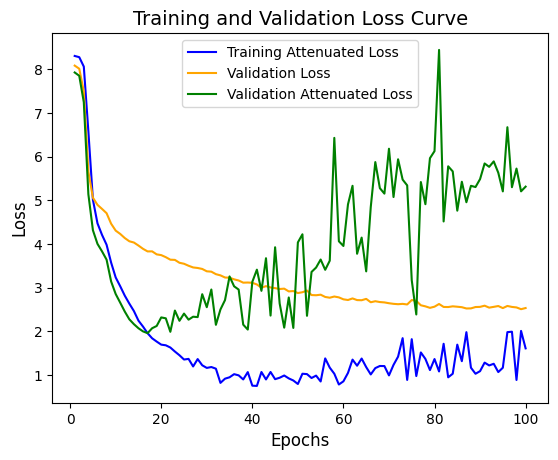

In [8]:
import matplotlib.pyplot as plt

# After training is finished, plot the loss curves
plt.plot(range(1, num_epochs+1), train_attenuated_losses, label='Training Attenuated Loss', color='blue')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', color='orange')
plt.plot(range(1, num_epochs+1), val_attenuated_losses, label='Validation Attenuated Loss', color='green')
# Labeling x and y axes
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
# Adding title
plt.title('Training and Validation Loss Curve', fontsize=14)
# Adding legend
plt.legend()
# Show the plot
plt.show()